# Case Study 6

Take a subset of the data and run the neural net presented in class:
N can be any number greater than 1 million, but less than 10.5 million (8GB Ram recommended for all the data).

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00280/

Work (10 points each)
 1. Pick 3 or more different architectures (add/subtract layers+neurons) and run the model + score. 
 1. With those same 3 architectures, run the SAME architecture but with 2 different (from sigmoid) activation functions.  Google the Keras documentation for a look at different available activations. 
 1. Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude
 1. Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.
 1. Take your best results from #3 and try 3 different optimizers. (LMGTFY)
 1. Take all that you’ve learned so far and give your best shot at producing a score. 

Questions to be  answered (These are loaded questions—be warned they are there to test your understanding):
 - 10 points - Q1: What was the effect of adding more layers/neurons.
 - 10 points - Q2: Which parameters gave you the best result and why (in your opinion) did they work.
 - 20 points Q3: For #6, how did you decide that your model was ‘done’

### INTRODUCTION

A neural network in deep learning is a multi layered perceptron modelled loosely after the human brain where the output of a perceptron serves as the input to another peceptron. Each perceptron takes in a linear cominbation of  the sum of the products of weights times an input which is usually features in a data set in vector form. Neural nets can be used to recognize patterns that can be applied in classifying or clustering a dataset. It is composed of an input layer, an output layer and sometimes one or more hidden layers.
The neurons in a neural network performs a weighted sum calculation from the inputed data and uses a non linear activation function to determine whether a neuron is fired.

In this case study, we sample 10500000 records from the Higgs dataset to develop a classification model using keras. We exepriment with different neural network architectures and deteremine the best architecture using roc_auc score as a measure. In each archicture we  perform hyper parameter tuning by trying different combinations of the number of hidderen layers, learning rate, activation functions and the number of neurons in each layer. The activation functions we used are the sigmoid function, tanh  function and relu(rectiftied linear unit.

After each model we plot the roc_auc curve to give a visual idea of the roc_auc score.


# Questions

#### Q1: What was the effect of adding more layers/neurons.

> It appears that adding too many layers (more than four) does not tend to help our accuracy. This of course might requiring additional tuning from our hyperparameters in conjunction with adding layers (the combinations could be endless). For us, three layers seem to be the sweet spot.

> It looks like, in general, the more neurons used the higher our accuracy went. For us, 1000 neurons works really well. Unsurprisingly, training time increases greatly by the number of neurons, so I think there is a point where squeezing more juice via neurons is not worth the computational cost of thes neurons.

#### Q2: Which parameters gave you the best result and why (in your opinion) did they work.
    
> We found that the best combination is three layers with 1000 hidden nodes in each layer. Relu activation for the hidden layers seems to work best for us. The default `kernel_initializer` (uniform) and `optimizer` (SGD) worked best for us.

> We suggest there are _many_ different combinations of important features for this data set. Because of this, 1000 nodes in each layer would help preserve information. One thing that was encountered is that the accuracy seemed to stall completely (at around 53%) when we decreased the learning rate (this happened very frequently when using different optimizers besides SGD). Perhaps this is due to a local minima being discovered by the optimizer.

#### Q3: For #6, how did you decide that your model was ‘done’

> We chose to finally come to an end when the return on our effort was diminishing (once it took us more than 5 or so iterations to get any marginal improvement).

> In actuality, I'm certain that we could spend more time working on this. For the most obvious work left, we should use more epochs and see how well our models perform over many different epochs (while looking at when they seem to be overfitting by introducing a validation dataset). Some of our architectures we are throwing away because they do not do so well at an arbitrary 5 epochs, but these slow-starters might end up performing better than our champion-algorithm after, say, 30 epochs.

# MODELLING BEGINS HERE

### IMPORT THE NECESSARY LIBRARIES

In [46]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import layers
from keras.optimizers import SGD, RMSprop, Adamax, Adagrad
from sklearn.metrics import roc_auc_score,roc_curve,auc
import keras
from pprint import pprint
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### READING IN HIGGS DATA

In [5]:
N=10500000. #Change this line adjust the number of rows. 
data=pd.read_csv("HIGGS.csv",nrows=N,header=None)

In [6]:
test_data=pd.read_csv("HIGGS.csv",nrows=500000,header=None,skiprows=10500000)

In [7]:
#column names from http://archive.ics.uci.edu/ml/datasets/HIGGS
data.columns=['label','lepton pt','lepton eta','lepton phi','missing energy magnitude','missing energy phi',
              'jet 1 pt','jet 1 eta','jet 1 phi','jet 1 b-tag','jet 2 pt','jet 2 eta','jet 2 phi','jet 2 b-tag',
              'jet 3 pt','jet 3 eta','jet 3 phi','jet 3 b-tag','jet 4 pt','jet 4 eta','jet 4 phi','jet 4 b-tag',
              'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
test_data.columns=['label','lepton pt','lepton eta','lepton phi','missing energy magnitude','missing energy phi',
              'jet 1 pt','jet 1 eta','jet 1 phi','jet 1 b-tag','jet 2 pt','jet 2 eta','jet 2 phi','jet 2 b-tag',
              'jet 3 pt','jet 3 eta','jet 3 phi','jet 3 b-tag','jet 4 pt','jet 4 eta','jet 4 phi','jet 4 b-tag',
              'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']

In [8]:
colnames=list(data.columns.values)

In [9]:
assert not ((data["label"]>0)&(data["label"]<1)).sum()

In [10]:
y = np.array(data.iloc[:,0])
x = np.array(data.iloc[:,1:])

y_test = np.array(test_data.iloc[:,0])
x_test = np.array(test_data.iloc[:,1:])

In [11]:
# the target (y) has a mean of close to .5 meaning it's well balanced between 0 and 1
y.mean()

0.5299634285714285

## Work 1

Pick 3 or more different architectures (add/subtract layers+neurons) and run the model + score.

In [14]:
#Begin 
# 1 layer (prof code)
model1 = Sequential()
model1.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.10))
model1.add(Dense(50, kernel_initializer='uniform'))
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.10))
model1.add(Dense(1, kernel_initializer='uniform')) 
model1.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model1.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model1.predict(x_test))
#end

Epoch 1/5
10500000/10500000 [==============================] - 32s 3us/step - loss: 0.6560 - acc: 0.5953
Epoch 2/5
10500000/10500000 [==============================] - 32s 3us/step - loss: 0.6052 - acc: 0.6688
Epoch 3/5
10500000/10500000 [==============================] - 32s 3us/step - loss: 0.5887 - acc: 0.6846
Epoch 4/5
10500000/10500000 [==============================] - 32s 3us/step - loss: 0.5800 - acc: 0.6919
Epoch 5/5
10500000/10500000 [==============================] - 32s 3us/step - loss: 0.5745 - acc: 0.6965


0.7802219373297237

In [15]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.6917 - acc: 0.5293
Epoch 2/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.6910 - acc: 0.5314
Epoch 3/5
10500000/10500000 [==============================] - 39s 4us/step - loss: 0.6405 - acc: 0.6270
Epoch 4/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.6091 - acc: 0.6676
Epoch 5/5
10500000/10500000 [==============================] - 39s 4us/step - loss: 0.5958 - acc: 0.6816


0.763182852379645

In [39]:
xt = model2.predict_proba(x_test)

In [47]:
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

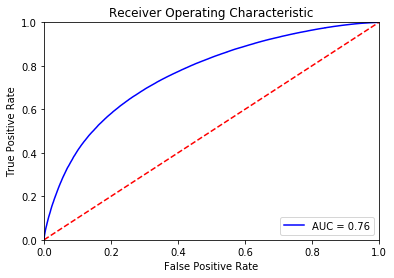

In [48]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# Begin Attempt 2
# Use original architecture (2 hidden layers in total) but now set all layers to have 25 neurons
model3 = Sequential()
model3.add(Dense(25, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model3.add(Activation('sigmoid'))
model3.add(Dropout(0.10))
model3.add(Dense(25, kernel_initializer='uniform'))
model3.add(Activation('sigmoid'))
model3.add(Dropout(0.10))
model3.add(Dense(1, kernel_initializer='uniform')) 
model3.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model3.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model3.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.6759 - acc: 0.5610
Epoch 2/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.6191 - acc: 0.6537
Epoch 3/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5971 - acc: 0.6789
Epoch 4/5
10500000/10500000 [==============================] - 30s 3us/step - loss: 0.5869 - acc: 0.6876
Epoch 5/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5801 - acc: 0.6930


0.7769535176194284

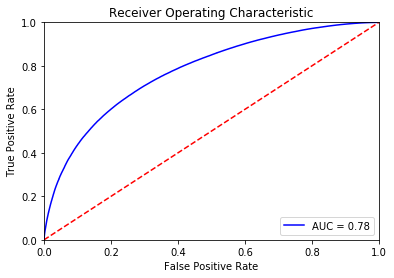

In [51]:
xt = model3.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
# Begin Attempt 3
# Use original architecture (2 hidden layers in total) but now set all layers to have 10 neurons
model4 = Sequential()
model4.add(Dense(10, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model4.add(Activation('sigmoid'))
model4.add(Dropout(0.10))
model4.add(Dense(10, kernel_initializer='uniform'))
model4.add(Activation('sigmoid'))
model4.add(Dropout(0.10))
model4.add(Dense(1, kernel_initializer='uniform')) 
model4.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model4.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model4.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 29s 3us/step - loss: 0.6865 - acc: 0.5411
Epoch 2/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.6224 - acc: 0.6542
Epoch 3/5
10500000/10500000 [==============================] - 27s 3us/step - loss: 0.6011 - acc: 0.6781
Epoch 4/5
10500000/10500000 [==============================] - 24s 2us/step - loss: 0.5948 - acc: 0.6826
Epoch 5/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5913 - acc: 0.6849


0.7626843501185123

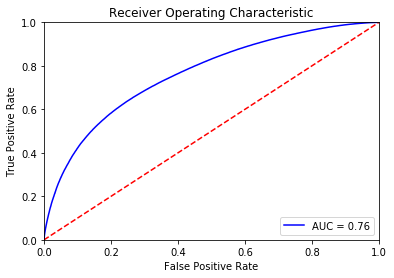

In [53]:
xt = model4.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Work 2
With those same 3 architectures, run the SAME architecture but with 2 different (from sigmoid) activation functions.  Google the Keras documentation for a look at different available activations. 


In [54]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5649 - acc: 0.7003
Epoch 2/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.5307 - acc: 0.7300
Epoch 3/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5247 - acc: 0.7342
Epoch 4/5
10500000/10500000 [==============================] - 39s 4us/step - loss: 0.5216 - acc: 0.7362
Epoch 5/5
10500000/10500000 [==============================] - 39s 4us/step - loss: 0.5196 - acc: 0.7374


0.8301348124297099

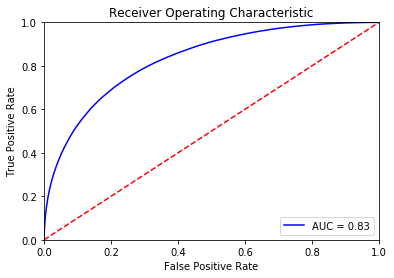

In [55]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# Begin Attempt 2
# Use original architecture (2 hidden layers in total) but now set all layers to have 25 neurons
# Use tanh activation
model3 = Sequential()
model3.add(Dense(25, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model3.add(Activation('tanh'))
model3.add(Dropout(0.10))
model3.add(Dense(25, kernel_initializer='uniform'))
model3.add(Activation('tanh'))
model3.add(Dropout(0.10))
model3.add(Dense(1, kernel_initializer='uniform')) 
model3.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model3.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model3.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5989 - acc: 0.6741
Epoch 2/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5694 - acc: 0.7004
Epoch 3/5
10500000/10500000 [==============================] - 30s 3us/step - loss: 0.5612 - acc: 0.7066
Epoch 4/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5557 - acc: 0.7105
Epoch 5/5
10500000/10500000 [==============================] - 31s 3us/step - loss: 0.5531 - acc: 0.7126


0.8057869875178826

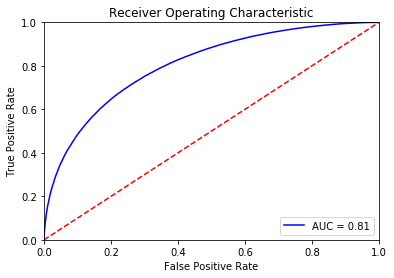

In [57]:
xt = model3.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
# Begin Attempt 3
# Use original architecture (2 hidden layers in total) but now set all layers to have 10 neurons
# Use relu
model4 = Sequential()
model4.add(Dense(10, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model4.add(Activation('relu'))
model4.add(Dropout(0.10))
model4.add(Dense(10, kernel_initializer='uniform'))
model4.add(Activation('relu'))
model4.add(Dropout(0.10))
model4.add(Dense(1, kernel_initializer='uniform')) 
model4.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model4.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model4.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5953 - acc: 0.6787
Epoch 2/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5762 - acc: 0.6984
Epoch 3/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5741 - acc: 0.6995
Epoch 4/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5734 - acc: 0.7000
Epoch 5/5
10500000/10500000 [==============================] - 28s 3us/step - loss: 0.5729 - acc: 0.7003


0.7911291984474589

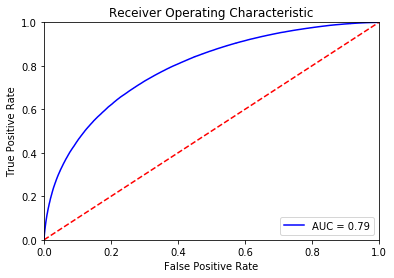

In [59]:
xt = model4.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Work 3
Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude

Note from KJ:

> I tried using batch_size=10 but it took forever to run (5 minutes per epoch). The following is batch_size=10000

In [60]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# Batch size originally 1000, now make batch size 100000
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=100000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.6914 - acc: 0.5296
Epoch 2/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.6913 - acc: 0.5300
Epoch 3/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.6912 - acc: 0.5300
Epoch 4/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.6907 - acc: 0.5300
Epoch 5/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.6744 - acc: 0.5746


0.6672134337514681

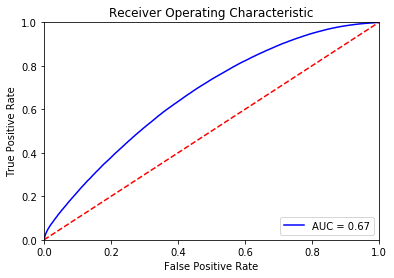

In [61]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Work 4

Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.

KJ Note

> results are about the same when removing the kernel_initializer from subsequent layers as shown in the first attempt here

In [62]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1)) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5621 - acc: 0.7064
Epoch 2/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5370 - acc: 0.7251
Epoch 3/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5299 - acc: 0.7302
Epoch 4/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5266 - acc: 0.7325
Epoch 5/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5245 - acc: 0.7341


0.8267708524676182

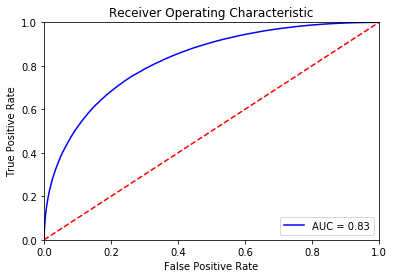

In [63]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# Begin Attempt 2
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# now use lecun_normal for initialization
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='lecun_normal')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1)) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5662 - acc: 0.7021
Epoch 2/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5384 - acc: 0.7243
Epoch 3/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5312 - acc: 0.7296
Epoch 4/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5276 - acc: 0.7321
Epoch 5/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5251 - acc: 0.7337


0.8280796532614998

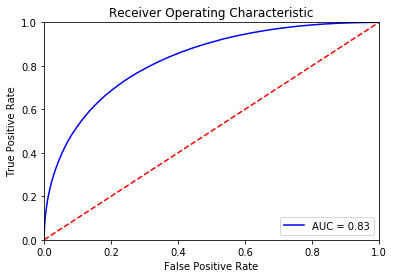

In [65]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
# Begin Attempt 3
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# now use random_uniform for initialization
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='random_uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1)) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 44s 4us/step - loss: 0.5599 - acc: 0.7076
Epoch 2/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5363 - acc: 0.7257
Epoch 3/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5298 - acc: 0.7304
Epoch 4/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5256 - acc: 0.7332
Epoch 5/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5234 - acc: 0.7348


0.8285688438800152

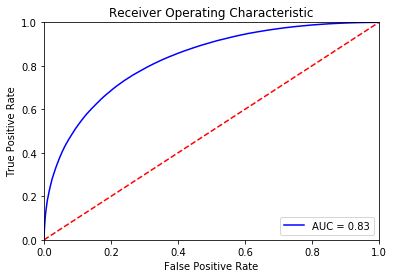

In [67]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Work 5

Take your best results from #3 and try 3 different optimizers. (LMGTFY)

> RMSprop, Adamax, Adagrad

In [68]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# Now use RMSprop
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

optimizer=RMSprop()
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5741 - acc: 0.6960
Epoch 2/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5434 - acc: 0.7213
Epoch 3/5
10500000/10500000 [==============================] - 44s 4us/step - loss: 0.5337 - acc: 0.7281
Epoch 4/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5288 - acc: 0.7319
Epoch 5/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5256 - acc: 0.7342


0.8269264708574523

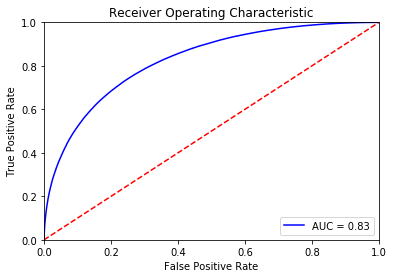

In [69]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# Now use Adamax
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

optimizer=Adamax()
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.5673 - acc: 0.7008
Epoch 2/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.5355 - acc: 0.7267
Epoch 3/5
10500000/10500000 [==============================] - 40s 4us/step - loss: 0.5279 - acc: 0.7320
Epoch 4/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5240 - acc: 0.7347
Epoch 5/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5218 - acc: 0.7360


0.8286814486563112

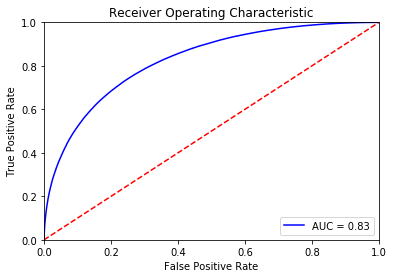

In [70]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# Begin Attempt 1
# Add a layer (3 hidden layers in total) with 50 neurons
# Now use a relu
# Now use Adamax
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

optimizer=Adagrad()
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5796 - acc: 0.6918
Epoch 2/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5526 - acc: 0.7142
Epoch 3/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5439 - acc: 0.7205
Epoch 4/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5386 - acc: 0.7242
Epoch 5/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5348 - acc: 0.7269


0.81732793015093

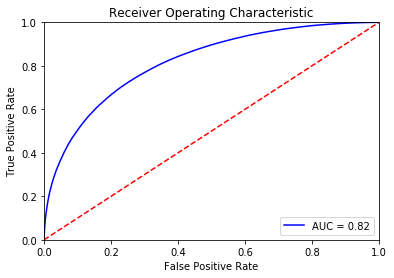

In [72]:
xt = model2.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Work 6

Take all that you’ve learned so far and give your best shot at producing a score.

In [38]:
## TODO: Delete
NUMBER_OF_X_TO_TAKE = 1050000
data_subset = data.sample(NUMBER_OF_X_TO_TAKE)
y = np.array(data_subset.iloc[:,0])
x = np.array(data_subset.iloc[:,1:])

y_test = np.array(test_data.iloc[:,0])
x_test = np.array(test_data.iloc[:,1:])

In [15]:
x.shape

(1050000, 28)

In [20]:
x.shape

(1050000, 28)

In [73]:
## Get a standard model
model_best = Sequential()
model_best.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(50))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(50))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5600 - acc: 0.7078
Epoch 2/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5355 - acc: 0.7266
Epoch 3/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5291 - acc: 0.7310
Epoch 4/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5256 - acc: 0.7334
Epoch 5/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5233 - acc: 0.7349


0.8286087388001365

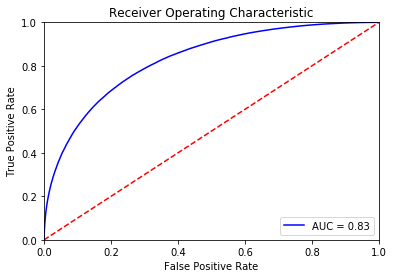

In [74]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
## nodes: 100, 50, 20
model_best = Sequential()
model_best.add(Dense(100, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(50))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(20))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 48s 5us/step - loss: 0.5551 - acc: 0.7117
Epoch 2/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5280 - acc: 0.7324
Epoch 3/5
10500000/10500000 [==============================] - 44s 4us/step - loss: 0.5217 - acc: 0.7367
Epoch 4/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5186 - acc: 0.7388
Epoch 5/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5165 - acc: 0.7402


0.8312408137473019

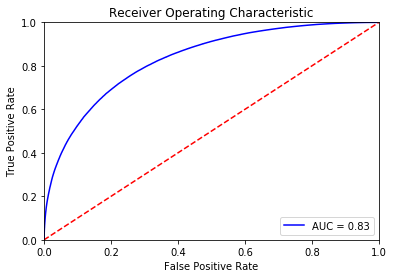

In [76]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
## nodes: 1000, 100, 10
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(10))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 160s 15us/step - loss: 0.5442 - acc: 0.7204
Epoch 2/5
10500000/10500000 [==============================] - 177s 17us/step - loss: 0.5114 - acc: 0.7447
Epoch 3/5
10500000/10500000 [==============================] - 182s 17us/step - loss: 0.5028 - acc: 0.7505
Epoch 4/5
10500000/10500000 [==============================] - 166s 16us/step - loss: 0.4978 - acc: 0.7539
Epoch 5/5
10500000/10500000 [==============================] - 168s 16us/step - loss: 0.4946 - acc: 0.7560


0.8473158438689317

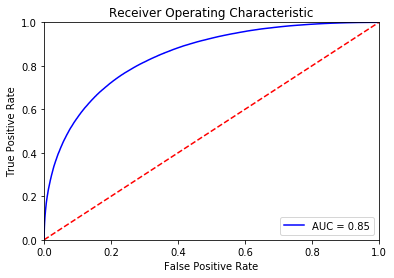

In [78]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
## nodes: 1000, 1000, 100
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 506s 48us/step - loss: 0.5288 - acc: 0.7302
Epoch 2/5
10500000/10500000 [==============================] - 506s 48us/step - loss: 0.4937 - acc: 0.7551
Epoch 3/5
10500000/10500000 [==============================] - 565s 54us/step - loss: 0.4847 - acc: 0.7609
Epoch 4/5
10500000/10500000 [==============================] - 523s 50us/step - loss: 0.4796 - acc: 0.7644
Epoch 5/5
10500000/10500000 [==============================] - 802s 76us/step - loss: 0.4758 - acc: 0.7668


0.8586039404745003

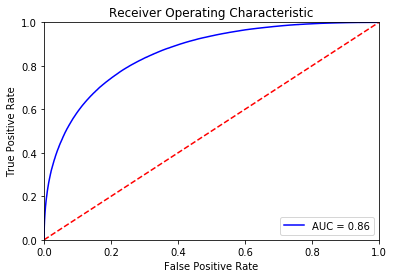

In [82]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
## nodes: 500, 200, 100
model_best = Sequential()
model_best.add(Dense(500, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(200))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 134s 13us/step - loss: 0.5369 - acc: 0.7245
Epoch 2/5
10500000/10500000 [==============================] - 131s 13us/step - loss: 0.5035 - acc: 0.7486
Epoch 3/5
10500000/10500000 [==============================] - 136s 13us/step - loss: 0.4948 - acc: 0.7543
Epoch 4/5
10500000/10500000 [==============================] - 142s 14us/step - loss: 0.4901 - acc: 0.7576
Epoch 5/5
10500000/10500000 [==============================] - 139s 13us/step - loss: 0.4871 - acc: 0.7595


0.8521778385506114

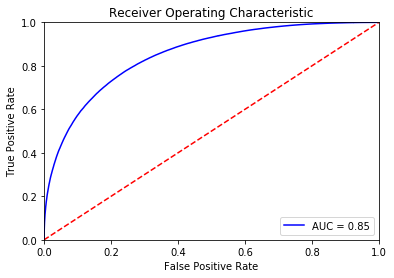

In [86]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
## nodes: 500, 200, 100
model_best = Sequential()
model_best.add(Dense(500, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(200))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 137s 13us/step - loss: 0.5371 - acc: 0.7244
Epoch 2/5
10500000/10500000 [==============================] - 139s 13us/step - loss: 0.5037 - acc: 0.7486
Epoch 3/5
10500000/10500000 [==============================] - 137s 13us/step - loss: 0.4952 - acc: 0.7541
Epoch 4/5
10500000/10500000 [==============================] - 138s 13us/step - loss: 0.4904 - acc: 0.7574
Epoch 5/5
10500000/10500000 [==============================] - 139s 13us/step - loss: 0.4872 - acc: 0.7595


0.8527513802963573

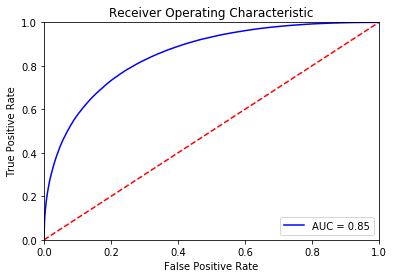

In [88]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
## nodes: 500, 400, 400
model_best = Sequential()
model_best.add(Dense(500, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(200))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 139s 13us/step - loss: 0.5363 - acc: 0.7248
Epoch 2/5
10500000/10500000 [==============================] - 140s 13us/step - loss: 0.5032 - acc: 0.7486
Epoch 3/5
10500000/10500000 [==============================] - 138s 13us/step - loss: 0.4948 - acc: 0.7542
Epoch 4/5
10500000/10500000 [==============================] - 140s 13us/step - loss: 0.4902 - acc: 0.7573
Epoch 5/5
10500000/10500000 [==============================] - 139s 13us/step - loss: 0.4870 - acc: 0.7593


0.8525868405460832

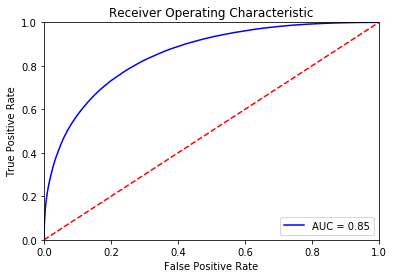

In [90]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
## nodes: 500, 300, 200, 100
model_best = Sequential()
model_best.add(Dense(500, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(300))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(200))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(100))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 212s 20us/step - loss: 0.5358 - acc: 0.7253
Epoch 2/5
10500000/10500000 [==============================] - 202s 19us/step - loss: 0.5011 - acc: 0.7502
Epoch 3/5
10500000/10500000 [==============================] - 206s 20us/step - loss: 0.4923 - acc: 0.7561
Epoch 4/5
10500000/10500000 [==============================] - 207s 20us/step - loss: 0.4873 - acc: 0.7593
Epoch 5/5
10500000/10500000 [==============================] - 213s 20us/step - loss: 0.4839 - acc: 0.7616


0.8551342126456879

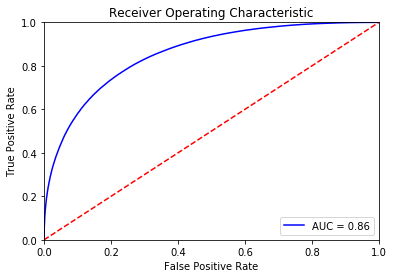

In [92]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
## nodes: 1000, 1000, 1000
## This is our winning model
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 944s 90us/step - loss: 0.5267 - acc: 0.7316
Epoch 2/5
10500000/10500000 [==============================] - 947s 90us/step - loss: 0.4912 - acc: 0.7565
Epoch 3/5
10500000/10500000 [==============================] - 949s 90us/step - loss: 0.4820 - acc: 0.7625
Epoch 4/5
10500000/10500000 [==============================] - 985s 94us/step - loss: 0.4764 - acc: 0.7661
Epoch 5/5
10500000/10500000 [==============================] - 1155s 110us/step - loss: 0.4724 - acc: 0.7690


0.8597839782512693

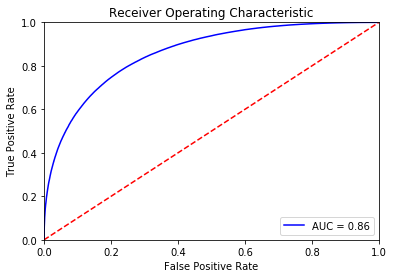

In [94]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
## nodes: 1000, 1000
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 502s 48us/step - loss: 0.5350 - acc: 0.7261
Epoch 2/5
10500000/10500000 [==============================] - 490s 47us/step - loss: 0.4996 - acc: 0.7515
Epoch 3/5
10500000/10500000 [==============================] - 483s 46us/step - loss: 0.4904 - acc: 0.7575
Epoch 4/5
10500000/10500000 [==============================] - 487s 46us/step - loss: 0.4850 - acc: 0.7610
Epoch 5/5
10500000/10500000 [==============================] - 490s 47us/step - loss: 0.4815 - acc: 0.7632


0.8539513425397621

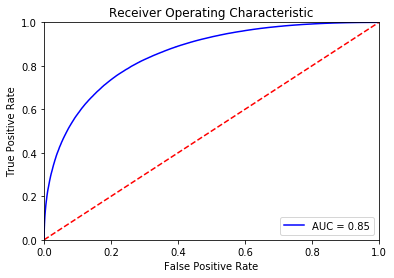

In [96]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
## nodes: 1000, 1000, 1000
## RMSPROP (lr=0.001)
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

optimizer = RMSprop(lr=0.001)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

model_best.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 991s 94us/step - loss: 0.5310 - acc: 0.7295
Epoch 2/5
10500000/10500000 [==============================] - 968s 92us/step - loss: 0.4979 - acc: 0.7537
Epoch 3/5
10500000/10500000 [==============================] - 997s 95us/step - loss: 0.4926 - acc: 0.7575
Epoch 4/5
10500000/10500000 [==============================] - 1071s 102us/step - loss: 0.4900 - acc: 0.7595
Epoch 5/5
10500000/10500000 [==============================] - 1088s 104us/step - loss: 0.4887 - acc: 0.7604


0.8530148992301667

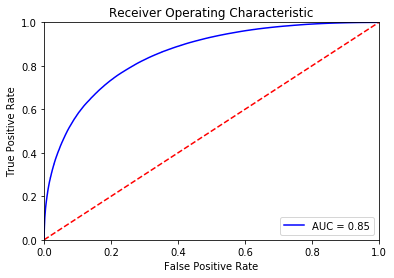

In [98]:
xt = model_best.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,xt)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
# Use all of our data again (instead of a sample)
y = np.array(data.iloc[:,0])
x = np.array(data.iloc[:,1:])

In [102]:
## nodes: 1000, 1000, 1000
## This is our winning model - note that it uses all of our data
model_best = Sequential()
model_best.add(Dense(1000, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1000))
model_best.add(Activation('relu'))
model_best.add(Dropout(0.10))
model_best.add(Dense(1)) 
model_best.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_best.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_best.fit(x, y, epochs=4, batch_size=1000)
roc_auc_score(y_test,model_best.predict(x_test))

Epoch 1/4
10500000/10500000 [==============================] - 1079s 103us/step - loss: 0.5276 - acc: 0.7308
Epoch 2/4
10500000/10500000 [==============================] - 1140s 109us/step - loss: 0.4911 - acc: 0.7566
Epoch 3/4
10500000/10500000 [==============================] - 1187s 113us/step - loss: 0.4819 - acc: 0.7627
Epoch 4/4
10500000/10500000 [==============================] - 1090s 104us/step - loss: 0.4762 - acc: 0.7665


0.8588438209718133